In [16]:
import numpy as np
import scipy.fftpack as fft
import numpy.random as rnd
import random
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

In [2]:
def get_series_from_log(log):
    series = [int(dat) for dat in log[12:-1]]
    return series

In [3]:
def window_shift_noise(signal, window_percent, shift, noise_var):
    # zero pad and window the second signal, shift also
    sig_a = signal
    window_size = int((window_percent)/100*len(sig_a))
    window_loc = int((len(sig_a) - window_size)/2)
    leading_zeros = np.zeros(window_loc + shift)
    trailing_zeros = np.zeros(window_loc - shift)
    sig_b = np.append(leading_zeros,sig_a[window_loc:window_loc+window_size])
    sig_b = np.append(sig_b, trailing_zeros)
    
    # Add noise idividually to signal b 
    var = noise_var
    sig_b = sig_b + np.sqrt(var) * rnd.randn(len(sig_b))
    return sig_b

In [4]:
def complexify(sig):
    i=[]
    q=[]
    for j in range(len(sig)):
        if j%2 == 0:
            i.append(sig[j])
        else:
            q.append(sig[j])
    i = np.array(i)
    q = np.array(q)
    return (i + 1j*q)

In [5]:
def fft_ccor(a, b):
    fft_a = fft.fft(a)
    fft_b = np.conj((fft.fft(b)))
    fft_crosscorr = np.fft.fftshift(np.fft.ifft(fft_a * fft_b))
    return fft_crosscorr

In [6]:
def get_corr_axis(corr_array):
    half_size = int(len(corr_array)/2)
    x = np.arange(-half_size, half_size)
    return x
    

# Import the Data

In [7]:
data_filename = "somesprinkles.txt"
with open(data_filename, 'r+') as datafile: 
    raw_sprinkles = datafile.readlines()
    
spkrlr_data = [log.split(',') for log in raw_sprinkles]
spkrlr_df = pd.DataFrame(spkrlr_data)

In [8]:
spkrlr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035
0,#SPRINKLERDATAA,UNKNOWN,63,56.5,FINESTEERING,2128,515219.000,02000020,5a00,32768;00000542,...,-15,-139,-20,-164,-15,-147,-31,-79,-30,-7*ae4fd02d\n
1,#SPRINKLERDATAA,UNKNOWN,62,57.0,FINESTEERING,2128,515219.000,02000020,5a00,32768;00000542,...,-5,-51,27,50,-26,56,-93,-9,21,-9*1dfdcb50\n
2,#SPRINKLERDATAA,UNKNOWN,61,57.0,FINESTEERING,2128,515219.000,02000020,5a00,32768;00000542,...,60,-114,5,-6,21,-81,2,-166,21,15*98e71507\n
3,#SPRINKLERDATAA,UNKNOWN,60,57.0,FINESTEERING,2128,515219.000,02000020,5a00,32768;00000542,...,68,20,-14,-47,16,-37,-21,-45,-46,-70*88f42263\n
4,#SPRINKLERDATAA,UNKNOWN,59,57.0,FINESTEERING,2128,515219.000,02000020,5a00,32768;00000542,...,35,-56,38,-34,-32,37,-40,-18,-13,70*02d7a15a\n


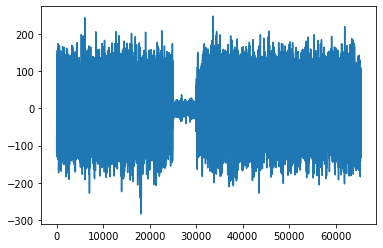

In [21]:
rand_epoch = random.randint(0,len(spkrlr_df))
epochs = spkrlr_df[6].astype(float).unique().tolist()
epoch_series = []
corr_epoch = epochs[10]
for log in spkrlr_data:
    if float(log[6]) == corr_epoch:
        epoch_series.extend(get_series_from_log(log))
        
plt.plot(epoch_series)

# Correlate with shifted signal

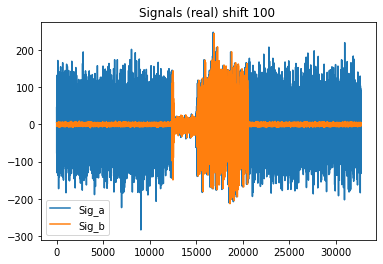

In [37]:
shift = 100
sig_a = complexify(epoch_series)
sig_b = window_shift_noise(sig_a, 25, shift, 5.0)

#plot the pre-correlation signals
plt.figure()
plt.title(f'Signals (real) shift {shift} ')
plt.plot(sig_a.real)
plt.plot(sig_b.real)
plt.legend(['Sig_a', 'Sig_b'])

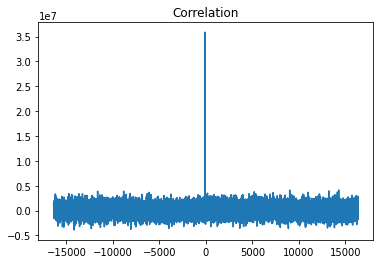

In [34]:
corr = fft_ccor(sig_a, sig_b)
x = get_corr_axis(corr)
plt.figure()
plt.title(f'Correlation')
plt.plot(x, corr.real)
# plt.xlim([max_shift-10, max_shift+10])
# plt.plot(corr.imag)
# plt.legend(['Real', 'Imag'])

In [35]:
max_shift = x[np.argmax(corr)]
print(f'Location of max: {max_shift}')

Location of max: -100


(-110.0, -90.0)

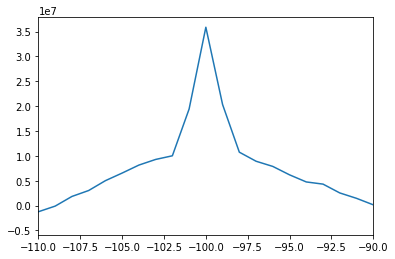

In [36]:
plt.plot(x, corr.real)
plt.xlim([max_shift-10, max_shift+10])

40